 ## 1. Import libraries

In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV
import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#export model
import joblib

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

import xgboost as xgb
import lightgbm as lgb


import warnings
warnings.filterwarnings("ignore")

## 2.Read datasets

### 2.1 load the datasets (train and test)

In [3]:
train = pd.read_csv('Data Science Challenge Datasets/training set/train_Jan2008-Dec2017.csv')
test = pd.read_csv('Data Science Challenge Datasets/test set/test_Jan2018-Jul2021.csv')

train

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
0,1/09/2021,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,Palmerston,-,2
1,1/09/2021,2008,1,Abduction - harassment and other offences agai...,Threatening behaviour,-,-,Darwin,-,2
2,1/09/2021,2008,1,Abduction - harassment and other offences agai...,Threatening behaviour,-,-,Palmerston,-,4
3,1/09/2021,2008,1,Acts intended to cause injury,Assault,Alcohol involved,DV,Darwin,-,12
4,1/09/2021,2008,1,Acts intended to cause injury,Assault,Alcohol involved,DV,NT Balance,Humpty Doo,1
...,...,...,...,...,...,...,...,...,...,...
6354,1/09/2021,2017,12,Sexual Assault and related offences,Sexual assault,-,-,Palmerston,-,2
6355,1/09/2021,2017,12,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,Darwin,-,250
6356,1/09/2021,2017,12,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,Howard Springs,9
6357,1/09/2021,2017,12,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,Humpty Doo,7


In [3]:
train = train.drop('Offence category', axis=1)
test = test.drop('Offence category', axis=1)

train = train.drop('As At', axis=1)
test = test.drop('As At', axis=1)


train.rename(columns={'Year':'year'},inplace=True)
train.rename(columns={'Month number':'month_number'},inplace=True)
train.rename(columns={'Offence category':'offence_category'},inplace=True)
train.rename(columns={'Offence type':'offence_type'},inplace=True)
train.rename(columns={'Alcohol involvement':'alcohol_involvement'},inplace=True)
train.rename(columns={'DV involvement':'dv_involvement'},inplace=True)
train.rename(columns={'Reporting region ':'reporting_region'},inplace=True)
train.rename(columns={'Statistical Area 2':'statistical_area2'},inplace=True)
train.rename(columns={'Number of offences':'number_of_offences'},inplace=True)
train.info()

test.rename(columns={'Year':'year'},inplace=True)
test.rename(columns={'Month number':'month_number'},inplace=True)
test.rename(columns={'Offence category':'offence_category'},inplace=True)
test.rename(columns={'Offence type':'offence_type'},inplace=True)
test.rename(columns={'Alcohol involvement':'alcohol_involvement'},inplace=True)
test.rename(columns={'DV involvement':'dv_involvement'},inplace=True)
test.rename(columns={'Reporting region ':'reporting_region'},inplace=True)
test.rename(columns={'Statistical Area 2':'statistical_area2'},inplace=True)
test.rename(columns={'Number of offences':'number_of_offences'},inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6359 entries, 0 to 6358
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 6359 non-null   int64 
 1   month_number         6359 non-null   int64 
 2   offence_type         6359 non-null   object
 3   alcohol_involvement  6359 non-null   object
 4   dv_involvement       6359 non-null   object
 5   reporting_region     6359 non-null   object
 6   statistical_area2    6359 non-null   object
 7   number_of_offences   6359 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 397.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 2334 non-null   int64 
 1   month_number         2334 non-null   int64 
 2   offence_type         2334 non-null   object
 

In [4]:
def same_element1(list1,list2):
    set1 = set(list1)
    set2 = set(list2)
    return (set1 & set2),(set1^set2),((set1|set2)-set2),((set1|set2)-set1)
same1,dif1,alone_forward1,alone_backward1 = same_element1(train['offence_type'],test['offence_type'])
print('same element:',same1)
print('differnet element:',dif1)
print('train set have, test set do not have:',alone_forward1)
print('test set have, train set do not have:',alone_backward1)

same element: {'Other acts intended to cause injury', 'Commercial break-ins attempted', 'Theft of motor vehicle parts or contents', 'Driving causing death', 'House break-ins attempted', 'Sexual assault', 'Manslaughter', 'Non-assaultive sexual offences', 'Attempted Murder', 'Murder', 'Deprivation of liberty /false imprisonment', 'House break-ins actual', 'Harassment and private nuisance', 'Theft and related offences (other than MV)', 'Property damage offences', 'Illegal use of a motor vehicle', 'Commercial break-ins actual', 'Threatening behaviour', 'Other dangerous or negligent acts endangering persons', 'Assault', 'Robbery', 'Blackmail and extortion'}
differnet element: {'Abduction and kidnapping'}
train set have, test set do not have: {'Abduction and kidnapping'}
test set have, train set do not have: set()


In [5]:
# def same_element2(list1,list2):
#     set1 = set(list1)
#     set2 = set(list2)
#     return (set1 & set2),(set1^set2),((set1|set2)-set2),((set1|set2)-set1)
# same2,dif2,alone_forward2,alone_backward2 = same_element2(train['offence_category'],test['offence_category'])
# print('same element:',same2)
# print('differnet element:',dif2)
# print('train set have, test set do not have:',alone_forward2)
# print('test set have, train set do not have:',alone_backward2)

KeyError: 'offence_category'

In [6]:
# train = train[(True^train['offence_type'].isin(['Abduction and kidnapping']))]


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6359 entries, 0 to 6358
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 6359 non-null   int64 
 1   month_number         6359 non-null   int64 
 2   offence_type         6359 non-null   object
 3   alcohol_involvement  6359 non-null   object
 4   dv_involvement       6359 non-null   object
 5   reporting_region     6359 non-null   object
 6   statistical_area2    6359 non-null   object
 7   number_of_offences   6359 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 397.6+ KB


In [8]:
# train = pd.concat([train, test], ignore_index=False, axis=0)
# train.info()

In [9]:
Missing = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['train', 'test'])
Missing[Missing.sum(axis=1) > 0]

,train,test


In [10]:
train.describe()

,year,month_number,number_of_offences
count,6359.000000,6359.000000,6359.000000
mean,2012.582796,6.503538,22.174398
std,2.869560,3.462005,50.739110
min,2008.000000,1.000000,1.000000
25%,2010.000000,3.000000,2.000000
50%,2013.000000,7.000000,5.000000
75%,2015.000000,10.000000,16.000000
max,2017.000000,12.000000,458.000000


In [11]:
# handle the population data

db_population_darin_palmerston = pd.read_csv('Data Science Challenge Datasets/training set/population-S3.csv')
db_population_humpty_howard = pd.read_csv('Data Science Challenge Datasets/training set/population-S2.csv')
db_population_darin_palmerston.info()
db_population_humpty_howard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        163 non-null    int64  
 1   Month       163 non-null    int64  
 2   Darwin      54 non-null     float64
 3   Palmerston  54 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 5.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            163 non-null    int64  
 1   Month           163 non-null    int64  
 2   Humpty Doo      15 non-null     float64
 3   Howard Springs  15 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 5.2 KB


In [12]:
db_population_darin_palmerston['Darwin']=db_population_darin_palmerston['Darwin'].fillna(db_population_darin_palmerston['Darwin'].interpolate())
db_population_darin_palmerston['Palmerston']=db_population_darin_palmerston['Palmerston'].fillna(db_population_darin_palmerston['Palmerston'].interpolate())

db_population_humpty_howard['Humpty Doo']=db_population_humpty_howard['Humpty Doo'].fillna(db_population_humpty_howard['Humpty Doo'].interpolate())
db_population_humpty_howard['Howard Springs']=db_population_humpty_howard['Howard Springs'].fillna(db_population_humpty_howard['Howard Springs'].interpolate())


In [13]:
db_population_darin_palmerston_int = db_population_darin_palmerston.round(0).astype(int)
db_population_humpty_howard_int = db_population_humpty_howard.round(0).astype(int)



In [14]:
db_population_darin_palmerston_melt = pd.melt(
        frame=db_population_darin_palmerston_int,
        id_vars=["Year","Month"],
        var_name="reporting_region",
        value_name="population_darwin_palmerston"
        )
db_population_humpty_howard_melt = pd.melt(
        frame=db_population_humpty_howard_int,
        id_vars=["Year","Month"],
        var_name="statistical_area2",
        value_name="population_humpty_howard"
        )


In [15]:
db_population_darin_palmerston_melt.rename(columns={'Year':'year'},inplace=True)
db_population_darin_palmerston_melt.rename(columns={'Month':'month_number'},inplace=True)

db_population_humpty_howard_melt.rename(columns={'Year':'year'},inplace=True)
db_population_humpty_howard_melt.rename(columns={'Month':'month_number'},inplace=True)


In [16]:
# handle the unployment data
db_unployment = pd.read_csv('Data Science Challenge Datasets/training set/Unployment.csv')
db_unployment.info()
db_unployment.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         163 non-null    object 
 1   unemployment_rate  163 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


,Unnamed: 0,unemployment_rate
0,2021-07-01,4.565508
1,2021-06-01,4.565828
2,2021-05-01,4.294306
3,2021-04-01,4.076868
4,2021-03-01,5.767351


In [17]:
db_unployment['date']= pd.to_datetime(db_unployment['Unnamed: 0'])
db_unployment['year'] = (db_unployment.date.dt.year)
db_unployment['month_number'] = (db_unployment.date.dt.month)


In [18]:
db_unployment_tomerge = db_unployment[['year','month_number','unemployment_rate']]
db_unployment_tomerge

,year,month_number,unemployment_rate
0,2021,7,4.565508
1,2021,6,4.565828
2,2021,5,4.294306
3,2021,4,4.076868
4,2021,3,5.767351
...,...,...,...
158,2008,5,3.435478
159,2008,4,4.231039
160,2008,3,4.459587
161,2008,2,5.426067


In [19]:
# handle the temperature data
temperature_darwin = pd.read_csv('Data Science Challenge Datasets/temperature/darwin.csv')
temperature_palmerston = pd.read_csv('Data Science Challenge Datasets/temperature/palmerston.csv')
temperature_darwin_palmerston = pd.concat([temperature_darwin, temperature_palmerston], ignore_index=False, axis=0)
temperature_darwin_palmerston.rename(columns={'Mean_maximum_temperature':'temperature_darwin_palmerston'},inplace=True)

temperature_darwin_palmerston.info()

temperature_humpty_doo = pd.read_csv('Data Science Challenge Datasets/temperature/humpty doo.csv')
temperature_howard_springs = pd.read_csv('Data Science Challenge Datasets/temperature/howard springs.csv')
temperature_humpty_doo_howard_springs = pd.concat([temperature_humpty_doo, temperature_howard_springs], ignore_index=False, axis=0)
temperature_humpty_doo_howard_springs = temperature_humpty_doo_howard_springs.drop('Bureau of Meteorology station number', axis=1)
temperature_humpty_doo_howard_springs = temperature_humpty_doo_howard_springs.drop('Quality', axis=1)
temperature_humpty_doo_howard_springs.rename(columns={'Year':'year'},inplace=True)
temperature_humpty_doo_howard_springs.rename(columns={'Month':'month_number'},inplace=True)
temperature_humpty_doo_howard_springs.rename(columns={'Mean maximum temperature (��C)':'temperature_humpty_howard'},inplace=True)


temperature_humpty_doo_howard_springs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 0 to 965
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reporting_region               1932 non-null   object 
 1   year                           1932 non-null   int64  
 2   month_number                   1932 non-null   int64  
 3   temperature_darwin_palmerston  1932 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 75.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 242
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   statistical_area2          486 non-null    object 
 1   year                       486 non-null    int64  
 2   month_number               486 non-null    int64  
 3   temperature_humpty_howard  486 non-null    float64
dtypes: float64(1), int64(2), ob

In [20]:
# handle the rainfall data
rainfall_darwin = pd.read_csv('Data Science Challenge Datasets/rainfall/darwin.csv')
rainfall_howard_springs = pd.read_csv('Data Science Challenge Datasets/rainfall/Howard Springs.csv')
rainfall_humpty_doo = pd.read_csv('Data Science Challenge Datasets/rainfall/humpty doo.csv')
rainfall_palmerston = pd.read_csv('Data Science Challenge Datasets/rainfall/palmerston.csv')
rainfall_darwin.info()
rainfall_darwin.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   reporting_region                          163 non-null    object 
 1   year                                      163 non-null    int64  
 2   month_number                              163 non-null    int64  
 3   Monthly_Precipitation_Total(millimetres)  163 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB


,reporting_region,year,month_number,Monthly_Precipitation_Total(millimetres)
0,Darwin,2008,1,398.4
1,Darwin,2008,2,746.3
2,Darwin,2008,3,201.3
3,Darwin,2008,4,30.4
4,Darwin,2008,5,0.0
5,Darwin,2008,6,0.0
6,Darwin,2008,7,0.0
7,Darwin,2008,8,0.0
8,Darwin,2008,9,0.8
9,Darwin,2008,10,69.0


In [21]:
rainfall_darwin_palmerston = pd.concat([rainfall_darwin, rainfall_palmerston], ignore_index=False, axis=0)
rainfall_darwin_palmerston.rename(columns={'Monthly_Precipitation_Total(millimetres)':'rainfall_millimetres_darwin_palmerston'},inplace=True)


rainfall_humpty_howard = pd.concat([ rainfall_howard_springs, rainfall_humpty_doo], ignore_index=False, axis=0)
rainfall_humpty_howard.rename(columns={'Monthly_Precipitation_Total(millimetres)':'rainfall_millimetres_humpty_howard'},inplace=True)


In [22]:
rainfall_darwin_palmerston.info()
rainfall_humpty_howard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 162
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   reporting_region                        326 non-null    object 
 1   year                                    326 non-null    int64  
 2   month_number                            326 non-null    int64  
 3   rainfall_millimetres_darwin_palmerston  326 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 12.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 162
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   statistical_area2                   326 non-null    object 
 1   year                                326 non-null    int64  
 2   month_number                        326 non-null  

### 2.2 merge the data

#### 2.21 merge the train data


In [23]:
train1 = pd.merge(train, db_unployment_tomerge, how='left', on=['year','month_number'])
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6359 entries, 0 to 6358
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 6359 non-null   int64  
 1   month_number         6359 non-null   int64  
 2   offence_type         6359 non-null   object 
 3   alcohol_involvement  6359 non-null   object 
 4   dv_involvement       6359 non-null   object 
 5   reporting_region     6359 non-null   object 
 6   statistical_area2    6359 non-null   object 
 7   number_of_offences   6359 non-null   int64  
 8   unemployment_rate    6359 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 496.8+ KB


In [24]:
train1 = pd.merge(train1, temperature_darwin_palmerston, how='left', on=['year','month_number','reporting_region'])
train1.head(5)

,year,month_number,offence_type,alcohol_involvement,dv_involvement,reporting_region,statistical_area2,number_of_offences,unemployment_rate,temperature_darwin_palmerston
0,2008,1,Harassment and private nuisance,-,-,Palmerston,-,2,5.394335,32.2
1,2008,1,Threatening behaviour,-,-,Darwin,-,2,5.394335,32.2
2,2008,1,Threatening behaviour,-,-,Palmerston,-,4,5.394335,32.2
3,2008,1,Assault,Alcohol involved,DV,Darwin,-,12,5.394335,32.2
4,2008,1,Assault,Alcohol involved,DV,NT Balance,Humpty Doo,1,5.394335,NaN


In [25]:
train1 = pd.merge(train1, temperature_humpty_doo_howard_springs, how='left', on=['year','month_number','statistical_area2'])

In [26]:
train1.info()
train1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6359 entries, 0 to 6358
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           6359 non-null   int64  
 1   month_number                   6359 non-null   int64  
 2   offence_type                   6359 non-null   object 
 3   alcohol_involvement            6359 non-null   object 
 4   dv_involvement                 6359 non-null   object 
 5   reporting_region               6359 non-null   object 
 6   statistical_area2              6359 non-null   object 
 7   number_of_offences             6359 non-null   int64  
 8   unemployment_rate              6359 non-null   float64
 9   temperature_darwin_palmerston  4562 non-null   float64
 10  temperature_humpty_howard      1797 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 596.2+ KB


year                                0
month_number                        0
offence_type                        0
alcohol_involvement                 0
dv_involvement                      0
reporting_region                    0
statistical_area2                   0
number_of_offences                  0
unemployment_rate                   0
temperature_darwin_palmerston    1797
temperature_humpty_howard        4562
dtype: int64

In [27]:
train1['temperature_darwin_palmerston'].fillna(0,inplace=True)
train1['temperature_humpty_howard'].fillna(0,inplace=True)
train1['temperature'] = train1['temperature_humpty_howard'] + train1['temperature_darwin_palmerston']
train1 = train1.drop('temperature_humpty_howard', axis=1)
train1 = train1.drop('temperature_darwin_palmerston', axis=1)


In [28]:
train1 = pd.merge(train1, rainfall_darwin_palmerston, how='left', on=['year','month_number','reporting_region'])


In [29]:
train1 = pd.merge(train1, rainfall_humpty_howard, how='left', on=['year','month_number','statistical_area2'])


In [30]:
train1['rainfall_millimetres_darwin_palmerston'].fillna(0,inplace=True)
train1['rainfall_millimetres_humpty_howard'].fillna(0,inplace=True)
train1['rainfall_millimetres'] = train1['rainfall_millimetres_humpty_howard'] + train1['rainfall_millimetres_darwin_palmerston']
train1 = train1.drop('rainfall_millimetres_humpty_howard', axis=1)
train1 = train1.drop('rainfall_millimetres_darwin_palmerston', axis=1)


In [31]:
train2 = pd.merge(train1, db_population_darin_palmerston_melt, how='left', on=['year','month_number','reporting_region'])
train2 = pd.merge(train2, db_population_humpty_howard_melt, how='left', on=['year','month_number','statistical_area2'])


train2['population_darwin_palmerston'].fillna(0,inplace=True)
train2['population_humpty_howard'].fillna(0,inplace=True)
train2['population'] = train2['population_humpty_howard'] + train2['population_darwin_palmerston']
train2 = train2.drop('population_humpty_howard', axis=1)
train2 = train2.drop('population_darwin_palmerston', axis=1)

train2.isnull().sum()


year                    0
month_number            0
offence_type            0
alcohol_involvement     0
dv_involvement          0
reporting_region        0
statistical_area2       0
number_of_offences      0
unemployment_rate       0
temperature             0
rainfall_millimetres    0
population              0
dtype: int64

In [32]:
train2['location'] = train2['reporting_region'] + train2['statistical_area2']
train2['location'] = train2['reporting_region'] + train2['statistical_area2']

train2.location[train2['location'] == 'Palmerston-'] = ['Palmerston']
train2.location[train2['location'] == 'Darwin-'] = ['Darwin']
train2.location[train2['location'] == 'Darwin-'] = ['Darwin']
train2.location[train2['location'] == 'NT BalanceHumpty Doo'] = ['Humpty Doo']
train2.location[train2['location'] == 'NT BalanceHoward Springs'] = ['Howard Springs']


train2 = train2.drop('statistical_area2', axis=1)
train2 = train2.drop('reporting_region', axis=1)



train2

,year,month_number,offence_type,alcohol_involvement,dv_involvement,number_of_offences,unemployment_rate,temperature,rainfall_millimetres,population,location
0,2008,1,Harassment and private nuisance,-,-,2,5.394335,32.2,379.3,27495.0,Palmerston
1,2008,1,Threatening behaviour,-,-,2,5.394335,32.2,398.4,75732.0,Darwin
2,2008,1,Threatening behaviour,-,-,4,5.394335,32.2,379.3,27495.0,Palmerston
3,2008,1,Assault,Alcohol involved,DV,12,5.394335,32.2,398.4,75732.0,Darwin
4,2008,1,Assault,Alcohol involved,DV,1,5.394335,33.8,367.5,6863.0,Humpty Doo
...,...,...,...,...,...,...,...,...,...,...,...
6354,2017,12,Sexual assault,-,-,2,4.934466,33.9,128.4,36786.0,Palmerston
6355,2017,12,Theft and related offences (other than MV),-,-,250,4.934466,33.9,222.9,86612.0,Darwin
6356,2017,12,Theft and related offences (other than MV),-,-,9,4.934466,35.6,140.6,7075.0,Howard Springs
6357,2017,12,Theft and related offences (other than MV),-,-,7,4.934466,35.6,121.4,8709.0,Humpty Doo


#### 2.22 merge the test data

In [33]:
test1 = pd.merge(test, db_unployment_tomerge, how='left', on=['year','month_number'])

test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2333
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 2334 non-null   int64  
 1   month_number         2334 non-null   int64  
 2   offence_type         2334 non-null   object 
 3   alcohol_involvement  2334 non-null   object 
 4   dv_involvement       2334 non-null   object 
 5   reporting_region     2334 non-null   object 
 6   statistical_area2    2334 non-null   object 
 7   number_of_offences   2334 non-null   int64  
 8   unemployment_rate    2334 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 182.3+ KB


In [34]:
test1 = pd.merge(test1, temperature_darwin_palmerston, how='left', on=['year','month_number','reporting_region'])

In [35]:
test1 = pd.merge(test1, temperature_humpty_doo_howard_springs, how='left', on=['year','month_number','statistical_area2'])

In [36]:
test1['temperature_darwin_palmerston'].fillna(0,inplace=True)
test1['temperature_humpty_howard'].fillna(0,inplace=True)
test1['temperature'] = test1['temperature_humpty_howard'] + test1['temperature_darwin_palmerston']
test1 = test1.drop('temperature_humpty_howard', axis=1)
test1 = test1.drop('temperature_darwin_palmerston', axis=1)

test1.isnull().sum()
test1.head(5)

,year,month_number,offence_type,alcohol_involvement,dv_involvement,reporting_region,statistical_area2,number_of_offences,unemployment_rate,temperature
0,2018,1,Deprivation of liberty /false imprisonment,-,-,Palmerston,-,1,3.878732,31.8
1,2018,1,Harassment and private nuisance,-,-,Darwin,-,1,3.878732,31.8
2,2018,1,Threatening behaviour,-,-,Darwin,-,2,3.878732,31.8
3,2018,1,Threatening behaviour,-,-,Palmerston,-,1,3.878732,31.8
4,2018,1,Assault,Alcohol involved,DV,Darwin,-,51,3.878732,31.8


In [37]:
test1 = pd.merge(test1, rainfall_darwin_palmerston, how='left', on=['year','month_number','reporting_region'])
test1 = pd.merge(test1, rainfall_humpty_howard, how='left', on=['year','month_number','statistical_area2'])
test1['rainfall_millimetres_darwin_palmerston'].fillna(0,inplace=True)
test1['rainfall_millimetres_humpty_howard'].fillna(0,inplace=True)
test1['rainfall_millimetres'] = test1['rainfall_millimetres_humpty_howard'] + test1['rainfall_millimetres_darwin_palmerston']
test1 = test1.drop('rainfall_millimetres_humpty_howard', axis=1)
test1 = test1.drop('rainfall_millimetres_darwin_palmerston', axis=1)

In [38]:
test1 = pd.merge(test1, db_population_darin_palmerston_melt, how='left', on=['year','month_number','reporting_region'])
test_final = pd.merge(test1, db_population_humpty_howard_melt, how='left', on=['year','month_number','statistical_area2'])


test_final['population_darwin_palmerston'].fillna(0,inplace=True)
test_final['population_humpty_howard'].fillna(0,inplace=True)
test_final['population'] = test_final['population_humpty_howard'] + test_final['population_darwin_palmerston']
test_final = test_final.drop('population_humpty_howard', axis=1)
test_final = test_final.drop('population_darwin_palmerston', axis=1)

test_final.isnull().sum()

year                    0
month_number            0
offence_type            0
alcohol_involvement     0
dv_involvement          0
reporting_region        0
statistical_area2       0
number_of_offences      0
unemployment_rate       0
temperature             0
rainfall_millimetres    0
population              0
dtype: int64

In [39]:
test_final['location'] = test_final['reporting_region'] + test_final['statistical_area2']
test_final['location'] = test_final['reporting_region'] + test_final['statistical_area2']

test_final.location[test_final['location'] == 'Palmerston-'] = ['Palmerston']
test_final.location[test_final['location'] == 'Darwin-'] = ['Darwin']
test_final.location[test_final['location'] == 'Darwin-'] = ['Darwin']
test_final.location[test_final['location'] == 'NT BalanceHumpty Doo'] = ['Humpty Doo']
test_final.location[test_final['location'] == 'NT BalanceHoward Springs'] = ['Howard Springs']


test_final = test_final.drop('statistical_area2', axis=1)
test_final = test_final.drop('reporting_region', axis=1)



test_final

,year,month_number,offence_type,alcohol_involvement,dv_involvement,number_of_offences,unemployment_rate,temperature,rainfall_millimetres,population,location
0,2018,1,Deprivation of liberty /false imprisonment,-,-,1,3.878732,31.8,206.3,36774.0,Palmerston
1,2018,1,Harassment and private nuisance,-,-,1,3.878732,31.8,876.6,86585.0,Darwin
2,2018,1,Threatening behaviour,-,-,2,3.878732,31.8,876.6,86585.0,Darwin
3,2018,1,Threatening behaviour,-,-,1,3.878732,31.8,206.3,36774.0,Palmerston
4,2018,1,Assault,Alcohol involved,DV,51,3.878732,31.8,876.6,86585.0,Darwin
...,...,...,...,...,...,...,...,...,...,...,...
2329,2021,7,Sexual assault,-,-,7,4.565508,32.3,0.0,83347.0,Darwin
2330,2021,7,Theft and related offences (other than MV),-,-,197,4.565508,32.3,0.0,83347.0,Darwin
2331,2021,7,Theft and related offences (other than MV),-,-,1,4.565508,34.0,0.0,7312.0,Howard Springs
2332,2021,7,Theft and related offences (other than MV),-,-,3,4.565508,34.0,0.0,8744.0,Humpty Doo


In [40]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2333
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  2334 non-null   int64  
 1   month_number          2334 non-null   int64  
 2   offence_type          2334 non-null   object 
 3   alcohol_involvement   2334 non-null   object 
 4   dv_involvement        2334 non-null   object 
 5   number_of_offences    2334 non-null   int64  
 6   unemployment_rate     2334 non-null   float64
 7   temperature           2334 non-null   float64
 8   rainfall_millimetres  2334 non-null   float64
 9   population            2334 non-null   float64
 10  location              2334 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 218.8+ KB


In [41]:
# train2 = train2.drop('year', axis=1)
# test_final = test_final.drop('year', axis=1)

In [42]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = test_final.columns.values.tolist()
for col in features:
    if test_final[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in test_final.columns:
        le = LabelEncoder()
        le.fit(list(test_final[col].astype(str).values))
        test_final[col] = le.transform(list(test_final[col].astype(str).values))
test_final

,year,month_number,offence_type,alcohol_involvement,dv_involvement,number_of_offences,unemployment_rate,temperature,rainfall_millimetres,population,location
0,2018,1,5,0,0,1,3.878732,31.8,206.3,36774.0,3
1,2018,1,7,0,0,1,3.878732,31.8,876.6,86585.0,0
2,2018,1,21,0,0,2,3.878732,31.8,876.6,86585.0,0
3,2018,1,21,0,0,1,3.878732,31.8,206.3,36774.0,3
4,2018,1,0,1,1,51,3.878732,31.8,876.6,86585.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2329,2021,7,18,0,0,7,4.565508,32.3,0.0,83347.0,0
2330,2021,7,19,0,0,197,4.565508,32.3,0.0,83347.0,0
2331,2021,7,19,0,0,1,4.565508,34.0,0.0,7312.0,1
2332,2021,7,19,0,0,3,4.565508,34.0,0.0,8744.0,2


In [43]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train2.columns.values.tolist()      
for col in features:
    if train2[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in train2.columns:
        le = LabelEncoder()
        le.fit(list(train2[col].astype(str).values))
        train2[col] = le.transform(list(train2[col].astype(str).values))
train2

,year,month_number,offence_type,alcohol_involvement,dv_involvement,number_of_offences,unemployment_rate,temperature,rainfall_millimetres,population,location
0,2008,1,8,0,0,2,5.394335,32.2,379.3,27495.0,3
1,2008,1,22,0,0,2,5.394335,32.2,398.4,75732.0,0
2,2008,1,22,0,0,4,5.394335,32.2,379.3,27495.0,3
3,2008,1,1,1,1,12,5.394335,32.2,398.4,75732.0,0
4,2008,1,1,1,1,1,5.394335,33.8,367.5,6863.0,2
...,...,...,...,...,...,...,...,...,...,...,...
6354,2017,12,19,0,0,2,4.934466,33.9,128.4,36786.0,3
6355,2017,12,20,0,0,250,4.934466,33.9,222.9,86612.0,0
6356,2017,12,20,0,0,9,4.934466,35.6,140.6,7075.0,1
6357,2017,12,20,0,0,7,4.934466,35.6,121.4,8709.0,2


In [44]:
train2.info()
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6359 entries, 0 to 6358
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  6359 non-null   int64  
 1   month_number          6359 non-null   int64  
 2   offence_type          6359 non-null   int32  
 3   alcohol_involvement   6359 non-null   int32  
 4   dv_involvement        6359 non-null   int32  
 5   number_of_offences    6359 non-null   int64  
 6   unemployment_rate     6359 non-null   float64
 7   temperature           6359 non-null   float64
 8   rainfall_millimetres  6359 non-null   float64
 9   population            6359 non-null   float64
 10  location              6359 non-null   int32  
dtypes: float64(4), int32(4), int64(3)
memory usage: 496.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2333
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  -----

## 3.EDA

In [45]:
valid_part = 0.4
pd.set_option('max_columns',100)

In [46]:
train2.corr()

,year,month_number,offence_type,alcohol_involvement,dv_involvement,number_of_offences,unemployment_rate,temperature,rainfall_millimetres,population,location
year,1.000000,-0.004878,-0.013156,0.030079,0.021627,-0.031968,0.181480,0.133586,-0.011657,0.059937,0.000294
month_number,-0.004878,1.000000,-0.006884,0.015710,0.014211,-0.015610,-0.318592,0.385636,-0.342698,0.006304,0.002153
offence_type,-0.013156,-0.006884,1.000000,-0.689640,-0.717067,0.234419,0.009902,0.020802,-0.005745,-0.028803,-0.027692
alcohol_involvement,0.030079,0.015710,-0.689640,1.000000,0.836214,-0.147105,-0.005795,0.009676,-0.004630,-0.009621,0.040887
dv_involvement,0.021627,0.014211,-0.717067,0.836214,1.000000,-0.121250,-0.002490,0.016319,-0.004825,-0.022208,0.044009
number_of_offences,-0.031968,-0.015610,0.234419,-0.147105,-0.121250,1.000000,-0.005612,-0.134107,0.021559,0.325014,-0.232478
unemployment_rate,0.181480,-0.318592,0.009902,-0.005795,-0.002490,-0.005612,1.000000,-0.064821,0.041731,0.003584,0.003356
temperature,0.133586,0.385636,0.020802,0.009676,0.016319,-0.134107,-0.064821,1.000000,-0.183625,-0.396968,0.034599
rainfall_millimetres,-0.011657,-0.342698,-0.005745,-0.004630,-0.004825,0.021559,0.041731,-0.183625,1.000000,0.015933,-0.027759
population,0.059937,0.006304,-0.028803,-0.009621,-0.022208,0.325014,0.003584,-0.396968,0.015933,1.000000,-0.695082


In [47]:
%matplotlib inline

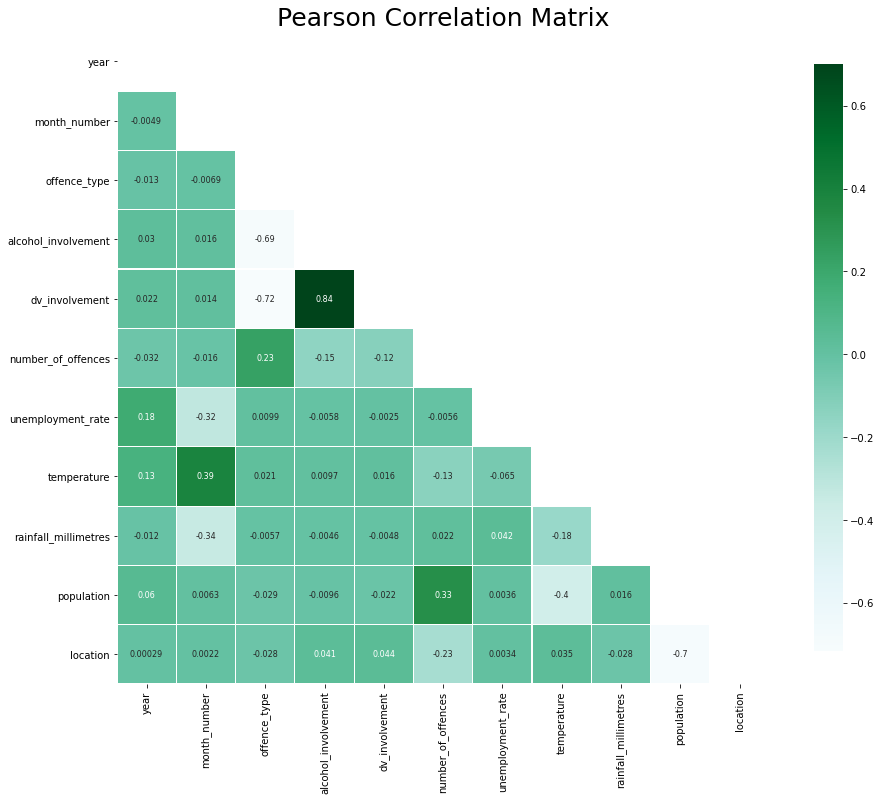

In [48]:
mask = np.zeros_like(train2[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(train2[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

<AxesSubplot:xlabel='population', ylabel='Density'>

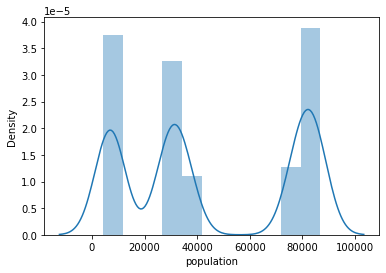

In [49]:
sns.distplot(train2['population'])

<AxesSubplot:xlabel='year', ylabel='Density'>

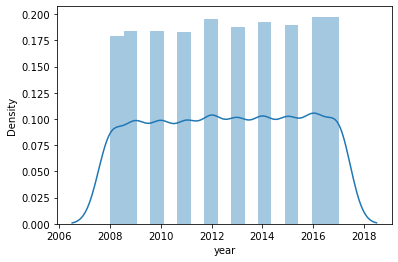

In [50]:
sns.distplot(train2['year'])

In [51]:
# sns.distplot(train2['offence_category'])

<AxesSubplot:xlabel='unemployment_rate', ylabel='Density'>

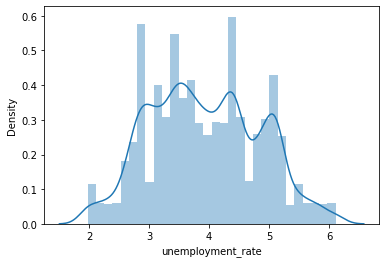

In [52]:
sns.distplot(train2['unemployment_rate'])

In [53]:
train2.describe(percentiles=[.01, .02, .03, .05, .1, .5, .9, .92, .93, .99])

,year,month_number,offence_type,alcohol_involvement,dv_involvement,number_of_offences,unemployment_rate,temperature,rainfall_millimetres,population,location
count,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000
mean,2012.582796,6.503538,9.999056,0.610631,0.466897,22.174398,3.923576,33.134314,156.613131,44181.851706,1.425539
std,2.869560,3.462005,7.767946,1.025924,0.754433,50.739110,0.903867,1.593344,195.425036,31755.477848,1.295969
min,2008.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.975568,29.000000,0.000000,4149.000000,0.000000
1%,2008.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.010952,29.700000,0.000000,4194.000000,0.000000
2%,2008.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.208943,30.600000,0.000000,4268.000000,0.000000
3%,2008.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.303785,30.800000,0.000000,4284.000000,0.000000
5%,2008.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.588368,31.100000,0.000000,4684.000000,0.000000
10%,2009.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.844497,31.300000,0.000000,6863.000000,0.000000
50%,2013.000000,7.000000,9.000000,0.000000,0.000000,5.000000,3.879355,32.900000,77.600000,33306.000000,1.000000


In [54]:
train2 = train2[(
                (train2['number_of_offences'] <= 283) &  
                (train2['rainfall_millimetres'] <= 500)
                )]

In [55]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 6358
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  5822 non-null   int64  
 1   month_number          5822 non-null   int64  
 2   offence_type          5822 non-null   int32  
 3   alcohol_involvement   5822 non-null   int32  
 4   dv_involvement        5822 non-null   int32  
 5   number_of_offences    5822 non-null   int64  
 6   unemployment_rate     5822 non-null   float64
 7   temperature           5822 non-null   float64
 8   rainfall_millimetres  5822 non-null   float64
 9   population            5822 non-null   float64
 10  location              5822 non-null   int32  
dtypes: float64(4), int32(4), int64(3)
memory usage: 454.8 KB


In [56]:
# pp.ProfileReport(train2)

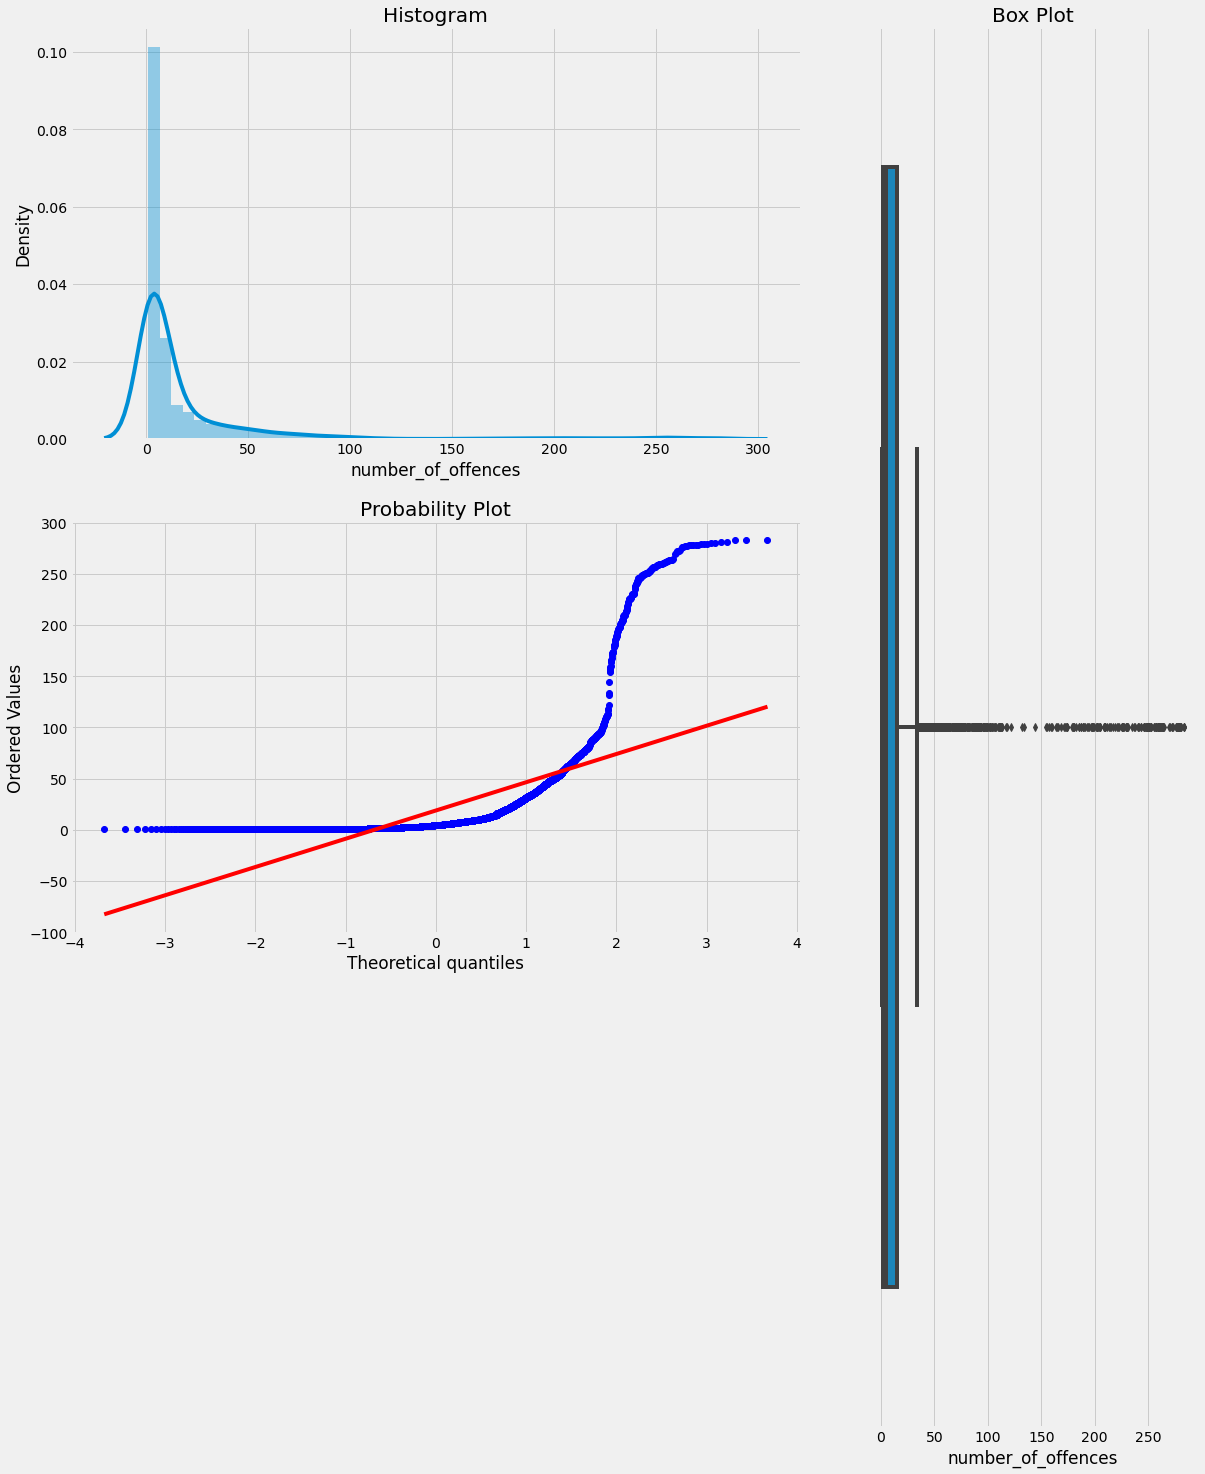

In [57]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(18,24))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train2, 'number_of_offences')

<AxesSubplot:ylabel='number_of_offences'>

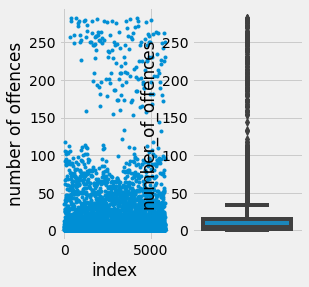

In [58]:
y = np.array(train2.number_of_offences)
plt.subplot(131)
plt.plot(range(len(y)),y,'.');plt.ylabel('number of offences');plt.xlabel('index');
plt.subplot(132)
sns.boxplot(y=train2.number_of_offences)

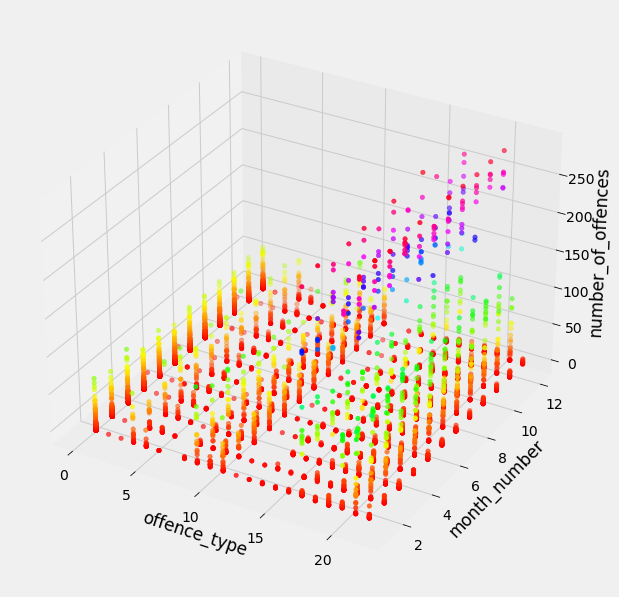

In [59]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = train2['number_of_offences']
x_points = train2['offence_type']
y_points = train2['month_number']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('offence_type')
ax.set_ylabel('month_number')
ax.set_zlabel('number_of_offences')

plt.show()

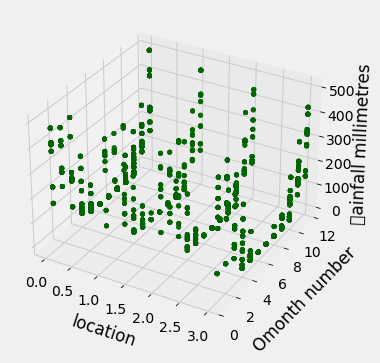

In [60]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(train2['location'],train2['month_number'],train2['rainfall_millimetres'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nlocation',ylabel='\nOmonth number',zlabel='\rainfall millimetres')
ax.set(ylim=[0,12])
plt.show()

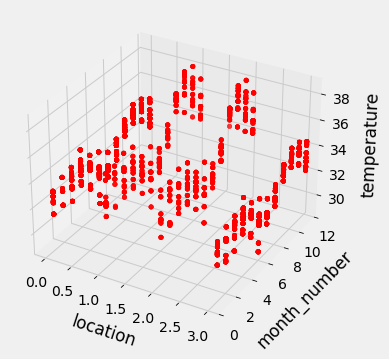

In [61]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(train2['location'],train2['month_number'],train2['temperature'],c="red",alpha=.5)
ax.set(xlabel='\nlocation',ylabel='\nmonth_number',zlabel='\ntemperature')
ax.set(ylim=[0,12])
plt.show()

In [62]:
grpby_month_number_df = train2[["number_of_offences", "month_number"]].groupby(by = "month_number", as_index = False)
grpby_month_number_df = grpby_month_number_df.mean().astype(int)
grpby_month_number_df.head(12)

,month_number,number_of_offences
0,1,17
1,2,18
2,3,20
3,4,19
4,5,19
5,6,17
6,7,18
7,8,18
8,9,19
9,10,18


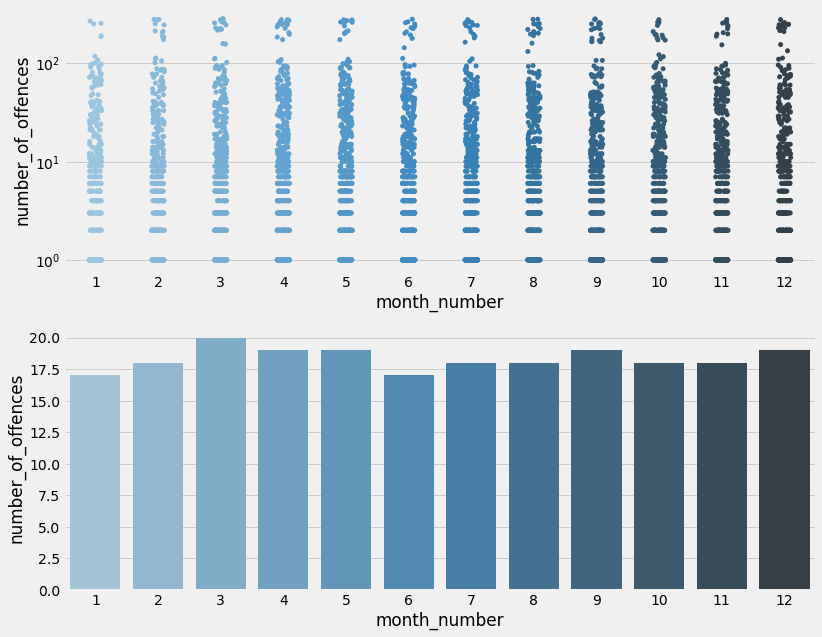

In [63]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.set(yscale = "log")
sns.stripplot(x = "month_number", y = "number_of_offences", data = train2, ax = ax1, jitter=True, palette="Blues_d")
sns.barplot(x = "month_number", y = "number_of_offences", data = grpby_month_number_df, ax = ax2, palette="Blues_d")
plt.show()

## 4.build the feature importance diagrams

### 4.1 LGBM

In [64]:
# Clone data for FE
train_fe = copy.deepcopy(train2)
target_fe = train_fe['number_of_offences']
del train_fe['number_of_offences']

In [65]:
X = train_fe
z = target_fe

In [66]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(X, z, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [67]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 30,
        'learning_rate': 0.05,
        'max_depth': 8,
        'subsample': 0.8,
        'bagging_fraction' : 0.8,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,        
    }

modelL = lgb.train(params, train_set = train_set, num_boost_round=1000,
                   early_stopping_rounds=50,verbose_eval=10, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 4657, number of used features: 10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Start training from score 19.307279
Training until validation scores don't improve for 50 rounds
[10]	valid_0's rmse: 27.5102
[20]	valid_0's rmse: 22.4726
[30]	valid_0's rmse: 16.7157
[40]	valid_0's rmse: 13.046
[50]	valid_0's rmse: 11.0555
[60]	valid_0's rmse: 9.931
[70]	valid_0's rmse: 9.00942
[80]	valid_0's rmse: 8.5137
[90]	valid_0's r

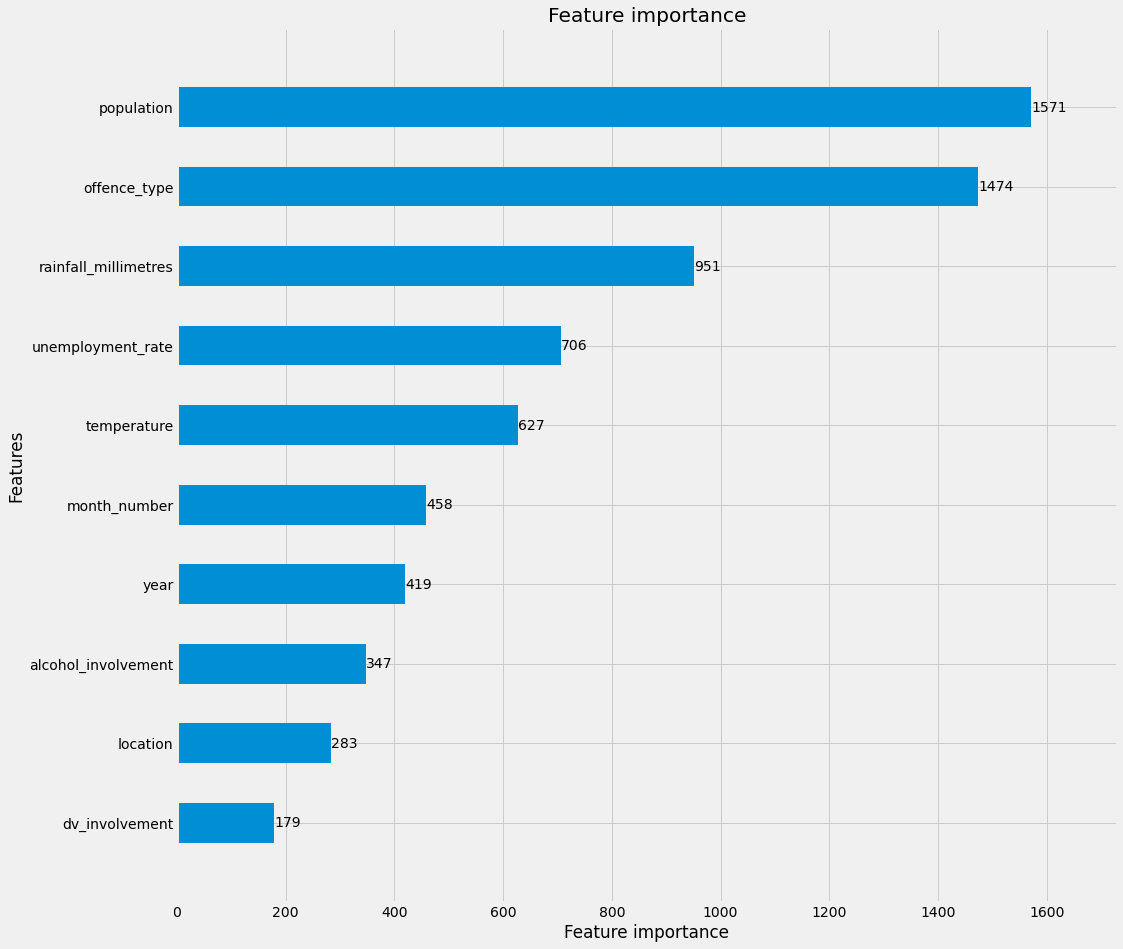

In [68]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();plt.close()

In [69]:
feature_score = pd.DataFrame(train_fe.columns, columns = ['feature']) 
feature_score['score_lgb'] = modelL.feature_importance()

### 4.2 XGB

In [70]:
#%% split training set to validation set 

data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xval   , label=Zval)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]

In [71]:
parms = {'max_depth':8, #maximum depth of a tree
         'objective':'reg:squarederror',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda'  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree':0.9,
         'colsample_bylevel':1,
         'min_child_weight': 10}
modelx = xgb.train(parms, 
                   data_tr, 
                   num_boost_round=200, 
                   evals = evallist,
                  early_stopping_rounds=30, maximize=False, 
                  verbose_eval=10)

print('score = %1.5f, n_boost_round =%d.'%(modelx.best_score,modelx.best_iteration))

[0]	train-rmse:33.56583	valid-rmse:30.01987
[10]	train-rmse:6.97195	valid-rmse:8.32183
[20]	train-rmse:5.63816	valid-rmse:7.89373
[30]	train-rmse:5.14534	valid-rmse:7.88827
[40]	train-rmse:4.75143	valid-rmse:7.95537
[50]	train-rmse:4.41918	valid-rmse:8.00458
[60]	train-rmse:4.22598	valid-rmse:8.02684
[62]	train-rmse:4.17350	valid-rmse:8.02418
score = 7.84785, n_boost_round =32.


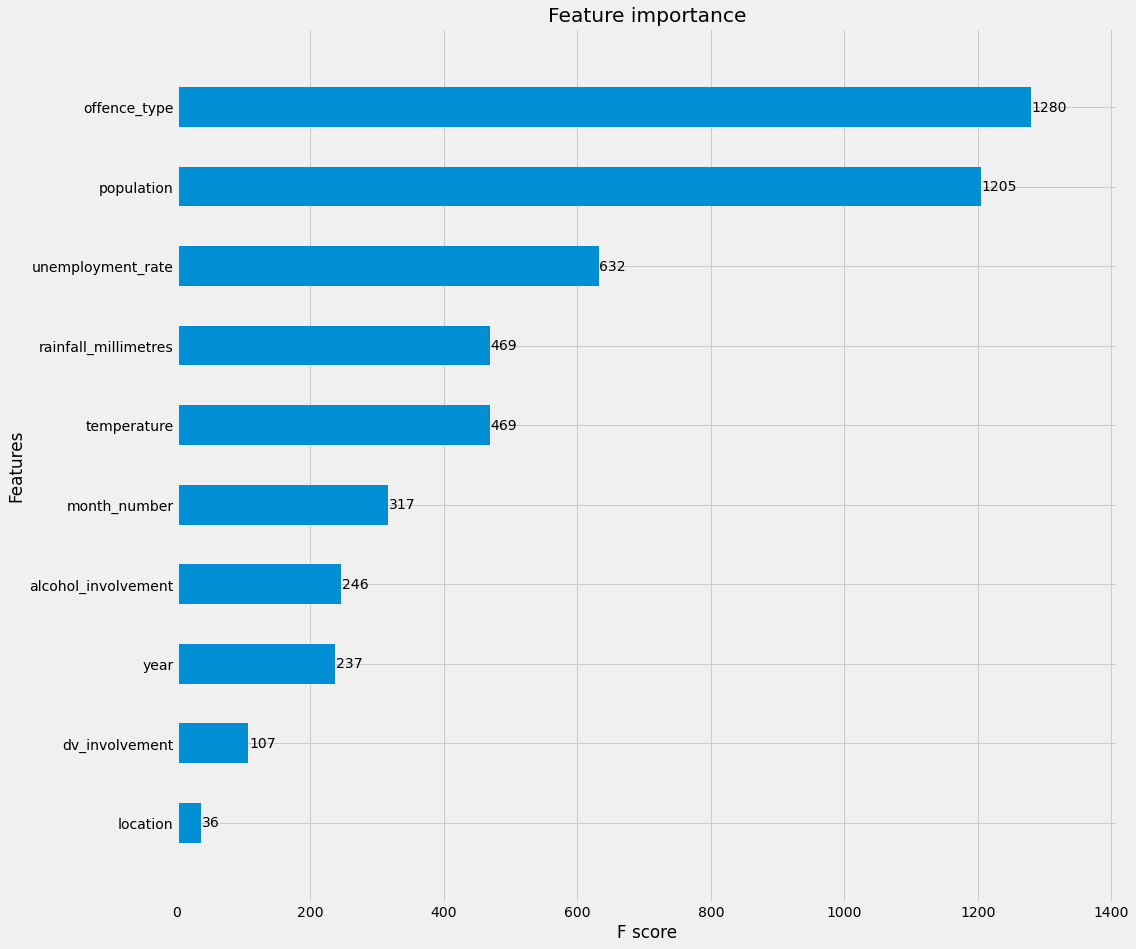

In [72]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(modelx,ax = axes,height = 0.5)
plt.show();plt.close()

In [73]:
feature_score['score_xgb'] = feature_score['feature'].map(modelx.get_score(importance_type='weight'))
feature_score

,feature,score_lgb,score_xgb
0,year,419,237
1,month_number,458,317
2,offence_type,1474,1280
3,alcohol_involvement,347,246
4,dv_involvement,179,107
5,unemployment_rate,706,632
6,temperature,627,469
7,rainfall_millimetres,951,469
8,population,1571,1205
9,location,283,36


### 4.3 Logistic Regression


In [74]:
# Standardization for regression model

train_fe = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(train_fe),
    columns=train_fe.columns,
    index=train_fe.index
)

In [75]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train_fe, target_fe)
coeff_logreg = pd.DataFrame(train_fe.columns.delete(0))
coeff_logreg.columns = ['feature']
coeff_logreg["score_logreg"] = pd.Series(logreg.coef_[0])
coeff_logreg.sort_values(by='score_logreg', ascending=False)

,feature,score_logreg
3,dv_involvement,0.952084
0,month_number,0.405549
6,rainfall_millimetres,0.353546
5,temperature,0.273788
1,offence_type,0.238188
7,population,-0.235468
4,unemployment_rate,-1.623581
2,alcohol_involvement,-2.158457
8,location,-5.516154


In [76]:
# the level of importance of features is not associated with the sign

coeff_logreg["score_logreg"] = coeff_logreg["score_logreg"].abs()
feature_score = pd.merge(feature_score, coeff_logreg, on='feature')

### 4.4 Linear Regression


In [77]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(train_fe, target_fe)
coeff_linreg = pd.DataFrame(train_fe.columns.delete(0))
coeff_linreg.columns = ['feature']
coeff_linreg["score_linreg"] = pd.Series(linreg.coef_)
coeff_linreg.sort_values(by='score_linreg', ascending=False)

,feature,score_linreg
8,location,40.202990
2,alcohol_involvement,34.890755
4,unemployment_rate,20.511861
7,population,2.012225
6,rainfall_millimetres,-0.120567
0,month_number,-0.423282
1,offence_type,-0.621542
5,temperature,-1.698892
3,dv_involvement,-10.699057


In [78]:
coeff_linreg["score_linreg"] = coeff_linreg["score_linreg"].abs()
feature_score = pd.merge(feature_score, coeff_linreg, on='feature')
feature_score = feature_score.fillna(0)
feature_score = feature_score.set_index('feature')
feature_score

,score_lgb,score_xgb,score_logreg,score_linreg
feature,,,,
month_number,458,317,0.405549,0.423282
offence_type,1474,1280,0.238188,0.621542
alcohol_involvement,347,246,2.158457,34.890755
dv_involvement,179,107,0.952084,10.699057
unemployment_rate,706,632,1.623581,20.511861
temperature,627,469,0.273788,1.698892
rainfall_millimetres,951,469,0.353546,0.120567
population,1571,1205,0.235468,2.012225
location,283,36,5.516154,40.202990


## 5. Comparison of the all feature importance diagrams 


<AxesSubplot:xlabel='feature'>

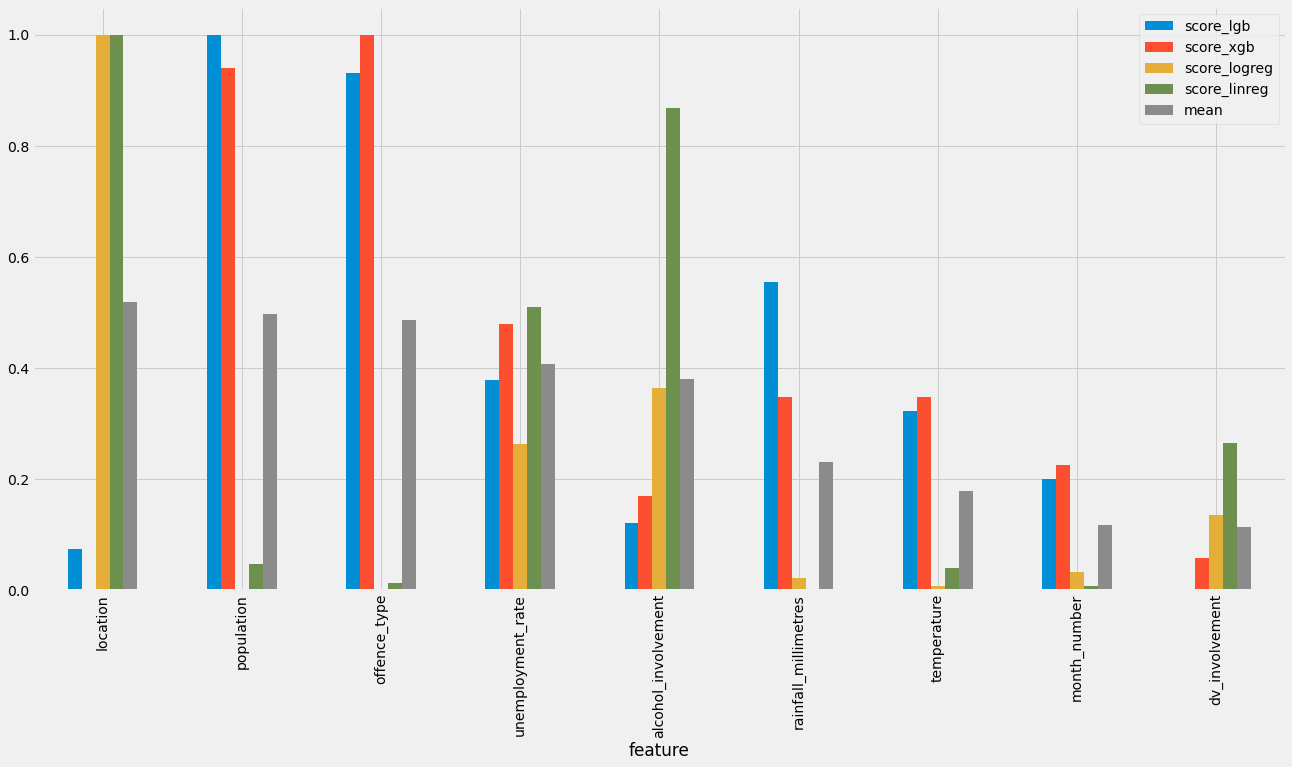

In [79]:
# MinMax scale all importances

feature_score = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(feature_score),
    columns=feature_score.columns,
    index=feature_score.index
)




# Create mean column
feature_score['mean'] = feature_score.mean(axis=1)

# Plot the feature importances
feature_score.sort_values('mean', ascending=False).plot(kind='bar', figsize=(20, 10))

In [80]:
feature_score.sort_values('mean', ascending=False)

,score_lgb,score_xgb,score_logreg,score_linreg,mean
feature,,,,,
location,0.074713,0.000000,1.000000,1.000000,0.518678
population,1.000000,0.939711,0.000000,0.047194,0.496726
offence_type,0.930316,1.000000,0.000515,0.012499,0.485832
unemployment_rate,0.378592,0.479100,0.262866,0.508734,0.407323
alcohol_involvement,0.120690,0.168810,0.364155,0.867467,0.380281
rainfall_millimetres,0.554598,0.348071,0.022360,0.000000,0.231257
temperature,0.321839,0.348071,0.007257,0.039377,0.179136
month_number,0.200431,0.225884,0.032208,0.007552,0.116519
dv_involvement,0.000000,0.057074,0.135705,0.263918,0.114174


<AxesSubplot:xlabel='feature'>

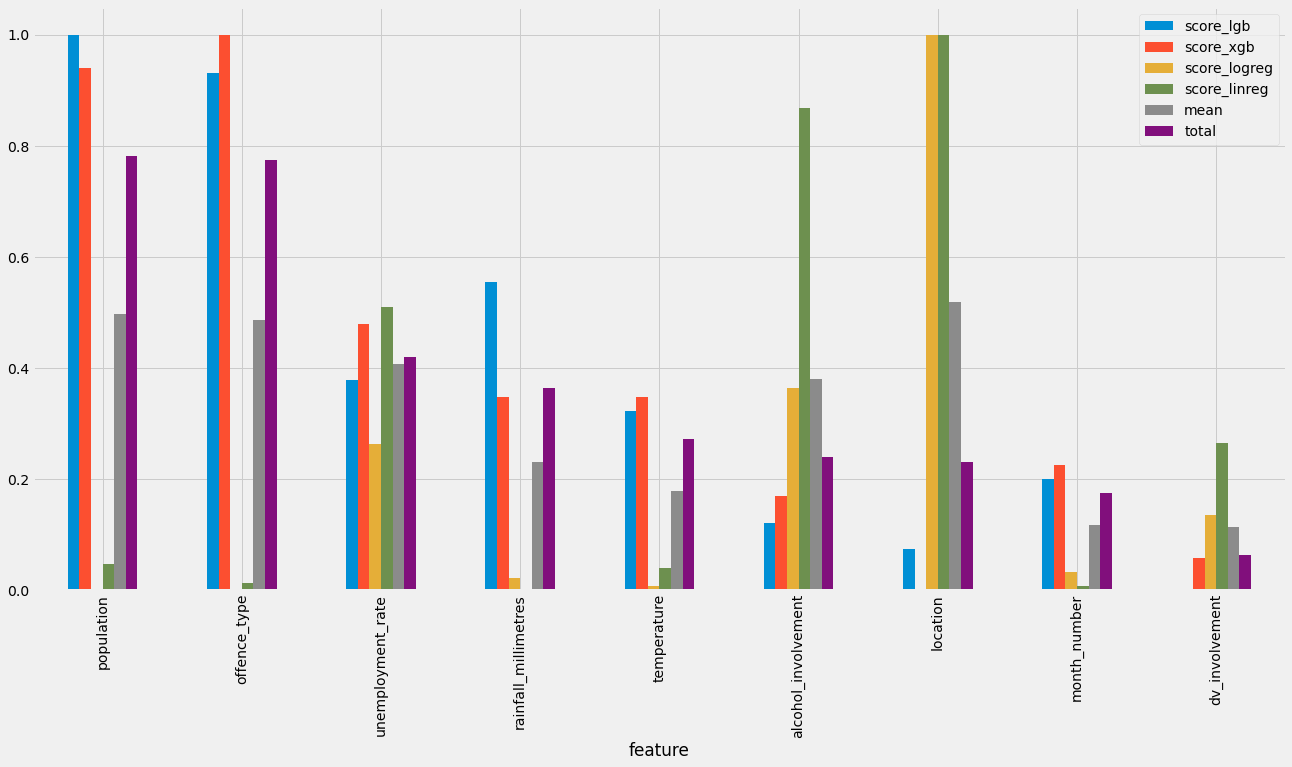

In [81]:
# Create total column with different weights

feature_score['total'] = 0.4*feature_score['score_lgb'] + 0.4*feature_score['score_xgb'] \
                       + 0.1*feature_score['score_logreg'] + 0.1*feature_score['score_linreg']

# Plot the feature importances
feature_score.sort_values('total', ascending=False).plot(kind='bar', figsize=(20, 10))

In [82]:
feature_score.sort_values('total', ascending=False)

,score_lgb,score_xgb,score_logreg,score_linreg,mean,total
feature,,,,,,
population,1.000000,0.939711,0.000000,0.047194,0.496726,0.780604
offence_type,0.930316,1.000000,0.000515,0.012499,0.485832,0.773428
unemployment_rate,0.378592,0.479100,0.262866,0.508734,0.407323,0.420237
rainfall_millimetres,0.554598,0.348071,0.022360,0.000000,0.231257,0.363303
temperature,0.321839,0.348071,0.007257,0.039377,0.179136,0.272627
alcohol_involvement,0.120690,0.168810,0.364155,0.867467,0.380281,0.238962
location,0.074713,0.000000,1.000000,1.000000,0.518678,0.229885
month_number,0.200431,0.225884,0.032208,0.007552,0.116519,0.174502
dv_involvement,0.000000,0.057074,0.135705,0.263918,0.114174,0.062792


## 6. Dada for modeling


In [83]:
target_name = 'number_of_offences'
train_target2 = train2[target_name]
train2 = train2.drop([target_name], axis=1)

In [84]:
test_target2 = test_final[target_name]
test2 = test_final.drop([target_name], axis=1)

In [85]:
test2

,year,month_number,offence_type,alcohol_involvement,dv_involvement,unemployment_rate,temperature,rainfall_millimetres,population,location
0,2018,1,5,0,0,3.878732,31.8,206.3,36774.0,3
1,2018,1,7,0,0,3.878732,31.8,876.6,86585.0,0
2,2018,1,21,0,0,3.878732,31.8,876.6,86585.0,0
3,2018,1,21,0,0,3.878732,31.8,206.3,36774.0,3
4,2018,1,0,1,1,3.878732,31.8,876.6,86585.0,0
...,...,...,...,...,...,...,...,...,...,...
2329,2021,7,18,0,0,4.565508,32.3,0.0,83347.0,0
2330,2021,7,19,0,0,4.565508,32.3,0.0,83347.0,0
2331,2021,7,19,0,0,4.565508,34.0,0.0,7312.0,1
2332,2021,7,19,0,0,4.565508,34.0,0.0,8744.0,2


In [86]:
test_target2

0         1
1         1
2         2
3         1
4        51
       ... 
2329      7
2330    197
2331      1
2332      3
2333     46
Name: number_of_offences, Length: 2334, dtype: int64

In [87]:
train2

,year,month_number,offence_type,alcohol_involvement,dv_involvement,unemployment_rate,temperature,rainfall_millimetres,population,location
0,2008,1,8,0,0,5.394335,32.2,379.3,27495.0,3
1,2008,1,22,0,0,5.394335,32.2,398.4,75732.0,0
2,2008,1,22,0,0,5.394335,32.2,379.3,27495.0,3
3,2008,1,1,1,1,5.394335,32.2,398.4,75732.0,0
4,2008,1,1,1,1,5.394335,33.8,367.5,6863.0,2
...,...,...,...,...,...,...,...,...,...,...
6354,2017,12,19,0,0,4.934466,33.9,128.4,36786.0,3
6355,2017,12,20,0,0,4.934466,33.9,222.9,86612.0,0
6356,2017,12,20,0,0,4.934466,35.6,140.6,7075.0,1
6357,2017,12,20,0,0,4.934466,35.6,121.4,8709.0,2


In [88]:
train2b = train2
train_target2b = train_target2
# Synthesis valid as test for selection models
trainb, validb, targetb, target_validb = train_test_split(train2b, train_target2b, test_size=valid_part, random_state=0)

# trainb = train2b
# targetb = train_target2b

testb = test2
target_testb = test_target2

In [89]:
targetb

1632      1
928       1
5164      2
996      17
2420      1
       ... 
5358      8
3547      1
1790     85
2888    237
3014     38
Name: number_of_offences, Length: 3493, dtype: int64

In [90]:
target_testb

0         1
1         1
2         2
3         1
4        51
       ... 
2329      7
2330    197
2331      1
2332      3
2333     46
Name: number_of_offences, Length: 2334, dtype: int64

In [91]:
trainb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1632 to 3014
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  3493 non-null   int64  
 1   month_number          3493 non-null   int64  
 2   offence_type          3493 non-null   int32  
 3   alcohol_involvement   3493 non-null   int32  
 4   dv_involvement        3493 non-null   int32  
 5   unemployment_rate     3493 non-null   float64
 6   temperature           3493 non-null   float64
 7   rainfall_millimetres  3493 non-null   float64
 8   population            3493 non-null   float64
 9   location              3493 non-null   int32  
dtypes: float64(4), int32(4), int64(2)
memory usage: 245.6 KB


In [92]:
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train2), columns = train2.columns)
train, valid, target, target_valid = train_test_split(train, train_target2, test_size=valid_part, random_state=0)



test = pd.DataFrame(scaler.fit_transform(test2), columns = test2.columns)
target_test = test_target2

In [93]:
valid

,year,month_number,offence_type,alcohol_involvement,dv_involvement,unemployment_rate,temperature,rainfall_millimetres,population,location
840,-1.245899,0.080443,1.557101,-0.599537,-0.623527,0.272643,-1.212872,-0.838303,1.105195,-1.132730
3338,0.149029,0.990432,0.268499,-0.599537,-0.623527,0.639132,0.536608,0.517316,1.283256,-1.132730
2976,0.149029,-1.132875,1.428241,-0.599537,-0.623527,1.031620,-0.775502,1.813065,1.257733,-1.132730
5114,1.195225,0.990432,-1.148963,1.344491,0.696536,-0.902705,0.349164,-0.189003,-0.229172,1.189094
527,-1.594631,1.597091,-0.762382,-0.599537,-0.623527,-0.560994,-0.650539,1.811640,1.058328,-1.132730
...,...,...,...,...,...,...,...,...,...,...
3160,0.149029,0.080443,-1.148963,0.372477,2.016600,1.361110,-1.087909,-0.838303,-0.372685,1.189094
2771,-0.199703,1.293762,0.526220,-0.599537,-0.623527,-1.346131,0.411646,-0.051445,1.234806,-1.132730
1404,-0.897167,0.080443,-1.148963,0.372477,2.016600,-1.813212,-0.400613,-0.838303,-0.447766,1.189094
3849,0.497761,0.687102,1.428241,-0.599537,-0.623527,-0.505351,-0.025724,-0.838303,1.294054,-1.132730


In [94]:
target_test

0         1
1         1
2         2
3         1
4        51
       ... 
2329      7
2330    197
2331      1
2332      3
2333     46
Name: number_of_offences, Length: 2334, dtype: int64

In [95]:
train2.head(3)

,year,month_number,offence_type,alcohol_involvement,dv_involvement,unemployment_rate,temperature,rainfall_millimetres,population,location
0,2008,1,8,0,0,5.394335,32.2,379.3,27495.0,3
1,2008,1,22,0,0,5.394335,32.2,398.4,75732.0,0
2,2008,1,22,0,0,5.394335,32.2,379.3,27495.0,3


In [96]:
len(train2)

5822

In [97]:
# train, test, target, target_test = train_test_split(train2, train_target2, test_size=valid_part, random_state=0)

In [98]:
target

1632      1
928       1
5164      2
996      17
2420      1
       ... 
5358      8
3547      1
1790     85
2888    237
3014     38
Name: number_of_offences, Length: 3493, dtype: int64

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  2334 non-null   float64
 1   month_number          2334 non-null   float64
 2   offence_type          2334 non-null   float64
 3   alcohol_involvement   2334 non-null   float64
 4   dv_involvement        2334 non-null   float64
 5   unemployment_rate     2334 non-null   float64
 6   temperature           2334 non-null   float64
 7   rainfall_millimetres  2334 non-null   float64
 8   population            2334 non-null   float64
 9   location              2334 non-null   float64
dtypes: float64(10)
memory usage: 182.5 KB


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1496 to 2732
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  3493 non-null   float64
 1   month_number          3493 non-null   float64
 2   offence_type          3493 non-null   float64
 3   alcohol_involvement   3493 non-null   float64
 4   dv_involvement        3493 non-null   float64
 5   unemployment_rate     3493 non-null   float64
 6   temperature           3493 non-null   float64
 7   rainfall_millimetres  3493 non-null   float64
 8   population            3493 non-null   float64
 9   location              3493 non-null   float64
dtypes: float64(10)
memory usage: 300.2 KB


In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  2334 non-null   float64
 1   month_number          2334 non-null   float64
 2   offence_type          2334 non-null   float64
 3   alcohol_involvement   2334 non-null   float64
 4   dv_involvement        2334 non-null   float64
 5   unemployment_rate     2334 non-null   float64
 6   temperature           2334 non-null   float64
 7   rainfall_millimetres  2334 non-null   float64
 8   population            2334 non-null   float64
 9   location              2334 non-null   float64
dtypes: float64(10)
memory usage: 182.5 KB


In [102]:
target_test

0         1
1         1
2         2
3         1
4        51
       ... 
2329      7
2330    197
2331      1
2332      3
2333     46
Name: number_of_offences, Length: 2334, dtype: int64

In [103]:
target_testb

0         1
1         1
2         2
3         1
4        51
       ... 
2329      7
2330    197
2331      1
2332      3
2333     46
Name: number_of_offences, Length: 2334, dtype: int64

## 7. Preparing to modeling


In [104]:
acc_train_r2 = []
acc_valid_r2 = []
acc_test_r2 = []

acc_train_d = []
acc_valid_d = []
acc_test_d = []

acc_train_mae = []
acc_valid_mae = []
acc_test_mae = []

acc_train_rmse = []
acc_valid_rmse = []
acc_test_rmse = []

In [105]:
def acc_mae(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)

def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [106]:
def acc_boosting_model(num,model,train,valid,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2,acc_valid_r2, acc_test_r2,acc_train_mae,acc_valid_mae, acc_test_mae, acc_train_d,acc_valid_d, acc_test_d, acc_train_rmse,acc_valid_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
        yvalid = model.predict(valid, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)
        yvalid = model.predict(valid)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 1, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)
    
    acc_train_mae_num = round(acc_mae(targetb, ytrain) * 1, 2)
    print('acc(mae) for train =', acc_train_mae_num)   
    acc_train_mae.insert(num, acc_train_mae_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 1, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 1, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)
    
    print('valid_target = ', target_validb[:5].values)
    print('yvalid = ', yvalid[:5])

    acc_valid_r2_num = round(r2_score(target_validb, yvalid) * 1, 2)
    print('acc(r2_score) for valid =', acc_valid_r2_num)   
    acc_valid_r2.insert(num, acc_valid_r2_num)

    acc_valid_mae_num = round(acc_mae(target_validb, yvalid) * 1, 2)
    print('acc(mae) for valid =', acc_valid_mae_num)   
    acc_valid_mae.insert(num, acc_valid_mae_num)
    
    acc_valid_d_num = round(acc_d(target_validb, yvalid) * 1, 2)
    print('acc(relative error) for valid =', acc_valid_d_num)   
    acc_valid_d.insert(num, acc_valid_d_num)

    acc_valid_rmse_num = round(acc_rmse(target_validb, yvalid) * 1, 2)
    print('acc(rmse) for valid =', acc_valid_rmse_num)   
    acc_valid_rmse.insert(num, acc_valid_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 1, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_mae_num = round(acc_mae(target_testb, ytest) * 1, 2)
    print('acc(mae) for test =', acc_test_mae_num)   
    acc_test_mae.insert(num, acc_test_mae_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 1, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 1, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [107]:
def acc_model(num,model,train,valid,test):
    # Calculation of accuracy of model from Sklearn by different metrics   
  
    global acc_train_r2,acc_valid_r2, acc_test_r2,acc_train_mae,acc_valid_mae, acc_test_mae, acc_train_d,acc_valid_d, acc_test_d, acc_train_rmse,acc_valid_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)
    yvalid = model.predict(valid)


    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 1, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_mae_num = round(acc_mae(target, ytrain) * 1, 2)
    print('acc(mae) for train =', acc_train_mae_num)   
    acc_train_mae.insert(num, acc_train_mae_num)
    
    acc_train_d_num = round(acc_d(target, ytrain) * 1, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 1, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('valid = ', target_valid[:5].values)
    print('yvalid = ', yvalid[:5])

    acc_valid_r2_num = round(r2_score(target_valid, yvalid) * 1, 2)
    print('acc(r2_score) for valid =', acc_valid_r2_num)   
    acc_valid_r2.insert(num, acc_valid_r2_num)

    acc_valid_mae_num = round(acc_mae(target_valid, yvalid) * 1, 2)
    print('acc(mae) for valid =', acc_valid_mae_num)   
    acc_valid_mae.insert(num, acc_valid_mae_num)
    
    acc_valid_d_num = round(acc_d(target_valid, yvalid) * 1, 2)
    print('acc(relative error) for valid =', acc_valid_d_num)   
    acc_valid_d.insert(num, acc_valid_d_num)

    acc_valid_rmse_num = round(acc_rmse(target_valid, yvalid) * 1, 2)
    print('acc(rmse) for valid =', acc_valid_rmse_num)   
    acc_valid_rmse.insert(num, acc_valid_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 1, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)

    acc_test_mae_num = round(acc_mae(target_test, ytest) * 1, 2)
    print('acc(mae) for test =', acc_test_mae_num)   
    acc_test_mae.insert(num, acc_test_mae_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 1, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 1, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)



In [108]:
target_test

0         1
1         1
2         2
3         1
4        51
       ... 
2329      7
2330    197
2331      1
2332      3
2333     46
Name: number_of_offences, Length: 2334, dtype: int64

## 8. Tuning models


### 8.1 Random Forest


In [109]:
# Random Forest

#random_forest = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators': [100, 1000]}, cv=5)
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(1,random_forest,train,valid,test)

target =  [ 1  1  2 17  1]
ytrain =  [ 1.13  1.03  1.9  15.74  1.16]
acc(r2_score) for train = 0.99
acc(mae) for train = 1.51
acc(relative error) for train = 0.08
acc(rmse) for train = 3.09
valid =  [ 3  1 52  4 33]
yvalid =  [ 4.72  2.15 51.39  4.47 47.28]
acc(r2_score) for valid = 0.95
acc(mae) for valid = 4.11
acc(relative error) for valid = 0.22
acc(rmse) for valid = 8.68
target_test = [ 1  1  2  1 51]
ytest = [ 1.91  3.17  8.62  2.1  39.69]
acc(r2_score) for test = 0.91
acc(mae) for test = 6.33
acc(relative error) for test = 0.32
acc(rmse) for test = 13.2


In [110]:
target_test.head(10)


0     1
1     1
2     2
3     1
4    51
5    13
6    34
7     1
8    12
9    22
Name: number_of_offences, dtype: int64

### 8.2 XGB


In [111]:
xgb_clf = xgb.XGBRegressor(objective='reg:squarederror') 
parameters = {'n_estimators': [60], 
#               'n_estimators': [50,55,60,75,80,85],
#               'learning_rate': [0.07,0.09,0.1,0.11,0.13],
              'learning_rate': [0.11],

#               'max_depth': [7,8,9],
              'max_depth': [8],
#               'reg_lambda': [0.51,0.53,0.55,0.57,0.59],
              'reg_lambda': [0.57],

            }
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)


Best score: 0.954
Best parameters set: {'learning_rate': 0.11, 'max_depth': 8, 'n_estimators': 60, 'reg_lambda': 0.57}


In [112]:
acc_boosting_model(2,xgb_reg,trainb,validb,testb)

target =  [ 1  1  2 17  1]
ytrain =  [ 2.025032   1.0632125  1.9757516 15.4429     1.7422663]
acc(r2_score) for train = 0.99
acc(mae) for train = 1.9
acc(relative error) for train = 0.1
acc(rmse) for train = 3.09
valid_target =  [ 3  1 52  4 33]
yvalid =  [ 7.451501   1.2333708 48.76905    5.7082677 46.39675  ]
acc(r2_score) for valid = 0.95
acc(mae) for valid = 4.15
acc(relative error) for valid = 0.22
acc(rmse) for valid = 8.62
target_test = [ 1  1  2  1 51]
ytest = [ 6.94557    2.8857331 24.653051  14.859015  40.412785 ]
acc(r2_score) for test = -1.02
acc(mae) for test = 27.45
acc(relative error) for test = 1.39
acc(rmse) for test = 61.31


### 8.3 LGBM


In [113]:
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [114]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,   
        'verbose':-1,
    }
modelL = lgb.train(params, train_set = train_set, num_boost_round=10000,
                   early_stopping_rounds=8000,verbose_eval=500, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
Training until validation scores don't improve for 8000 rounds
[500]	valid_0's rmse: 9.42228
[1000]	valid_0's rmse: 8.65937
[1500]	valid_0's rmse: 8.5808
[2000]	valid_0's rmse: 8.54793
[2500]	valid_0's rmse: 8.53992
[3000]	valid_0's rmse: 8.53992
[3500]	valid_0's rmse: 8.53992
[4000]	valid_0's rmse: 8.53992
[4500]	valid_0's rmse: 8.53992
[5000]	valid_0's rmse: 8.53992
[5500]	valid_0's rmse: 8.53992
[6000]	valid_0's rmse: 8.53992
[6500]	valid_0's rmse: 8.53992
[7000]	valid_0's rmse: 8.53992
[7500]	valid_0's rmse: 8.53992
[8000]	valid_0's rmse: 8.53992
[8500]	valid_0's rmse: 8.53992
[9000]	valid_0's rmse: 8.53992
[9500]	valid_0's rmse: 8.53992
[10000]	valid_0's rmse: 8.53992
Did not meet early stopping. Best iteration is:
[2314]	valid_0's rmse: 8.53975


In [115]:
acc_boosting_model(3,modelL,trainb,validb,testb,modelL.best_iteration)

target =  [ 1  1  2 17  1]
ytrain =  [ 0.87028641  1.49003744  2.19936161 16.98269504  4.41800812]
acc(r2_score) for train = 0.98
acc(mae) for train = 3.02
acc(relative error) for train = 0.16
acc(rmse) for train = 5.25
valid_target =  [ 3  1 52  4 33]
yvalid =  [ 3.13590568 -0.08998979 62.86835836  4.82837831 60.36476609]
acc(r2_score) for valid = 0.95
acc(mae) for valid = 4.73
acc(relative error) for valid = 0.26
acc(rmse) for valid = 8.73
target_test = [ 1  1  2  1 51]
ytest = [ 2.21455285  3.24229788 32.81115209 15.29095702 37.52899364]
acc(r2_score) for test = -1.06
acc(mae) for test = 27.77
acc(relative error) for test = 1.41
acc(rmse) for test = 61.91


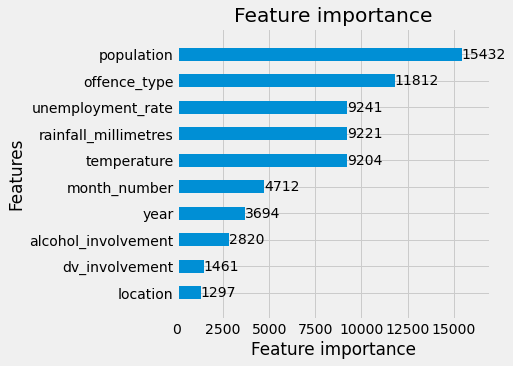

In [116]:
fig =  plt.figure(figsize = (5,5))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()

### 9 Models comparison


In [117]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'XGB', 'LGBM'],
    
    'r2_train': acc_train_r2,
    'r2_valid':acc_valid_r2,
    'r2_test': acc_test_r2,
    
    'mae_train': acc_train_mae,
    'mae_valid': acc_valid_mae,
    'mae_test': acc_test_mae,
    
    'd_train': acc_train_d,
    'd_valid': acc_valid_d,
    'd_test': acc_test_d,
    
    'rmse_train': acc_train_rmse,
    'rmse_valid': acc_valid_rmse,
    'rmse_test': acc_test_rmse
                     })

In [118]:
pd.options.display.float_format = '{:,.2f}'.format

In [119]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test','r2_valid', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


,Model,r2_train,r2_valid,r2_test,mae_train,mae_valid,mae_test,d_train,d_valid,d_test,rmse_train,rmse_valid,rmse_test
0,Random Forest,0.99,0.95,0.91,1.51,4.11,6.33,0.08,0.22,0.32,3.09,8.68,13.20
1,XGB,0.99,0.95,-1.02,1.90,4.15,27.45,0.10,0.22,1.39,3.09,8.62,61.31
2,LGBM,0.98,0.95,-1.06,3.02,4.73,27.77,0.16,0.26,1.41,5.25,8.73,61.91


In [120]:
print('Prediction accuracy for models by MAE - mae_test')
models.sort_values(by=['mae_test','mae_valid', 'mae_train'], ascending=True)

Prediction accuracy for models by MAE - mae_test


,Model,r2_train,r2_valid,r2_test,mae_train,mae_valid,mae_test,d_train,d_valid,d_test,rmse_train,rmse_valid,rmse_test
0,Random Forest,0.99,0.95,0.91,1.51,4.11,6.33,0.08,0.22,0.32,3.09,8.68,13.20
1,XGB,0.99,0.95,-1.02,1.90,4.15,27.45,0.10,0.22,1.39,3.09,8.62,61.31
2,LGBM,0.98,0.95,-1.06,3.02,4.73,27.77,0.16,0.26,1.41,5.25,8.73,61.91


In [121]:
print('Prediction accuracy for models by relative error - d_test')
models.sort_values(by=['d_test', 'd_valid', 'd_train'], ascending=True)

Prediction accuracy for models by relative error - d_test


,Model,r2_train,r2_valid,r2_test,mae_train,mae_valid,mae_test,d_train,d_valid,d_test,rmse_train,rmse_valid,rmse_test
0,Random Forest,0.99,0.95,0.91,1.51,4.11,6.33,0.08,0.22,0.32,3.09,8.68,13.20
1,XGB,0.99,0.95,-1.02,1.90,4.15,27.45,0.10,0.22,1.39,3.09,8.62,61.31
2,LGBM,0.98,0.95,-1.06,3.02,4.73,27.77,0.16,0.26,1.41,5.25,8.73,61.91


In [122]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_valid','rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,Model,r2_train,r2_valid,r2_test,mae_train,mae_valid,mae_test,d_train,d_valid,d_test,rmse_train,rmse_valid,rmse_test
0,Random Forest,0.99,0.95,0.91,1.51,4.11,6.33,0.08,0.22,0.32,3.09,8.68,13.20
1,XGB,0.99,0.95,-1.02,1.90,4.15,27.45,0.10,0.22,1.39,3.09,8.62,61.31
2,LGBM,0.98,0.95,-1.06,3.02,4.73,27.77,0.16,0.26,1.41,5.25,8.73,61.91


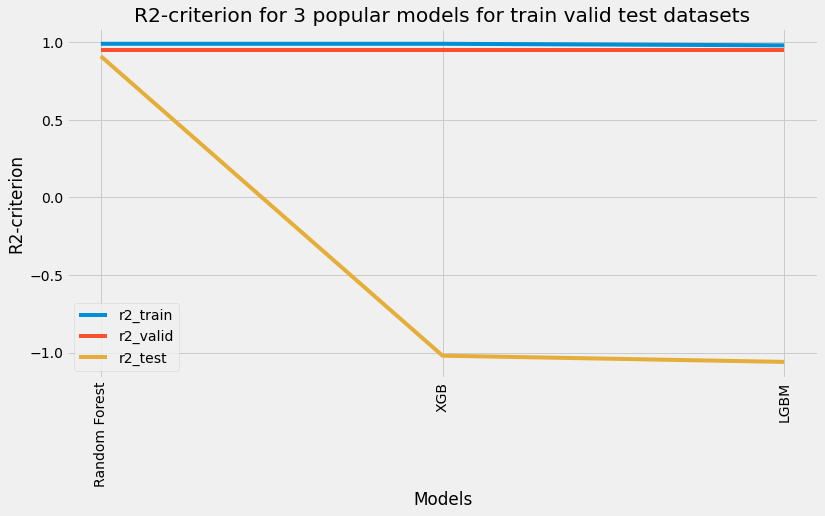

In [123]:
# Plot
plt.figure(figsize=[12,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_valid'], label = 'r2_valid')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for 3 popular models for train valid test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

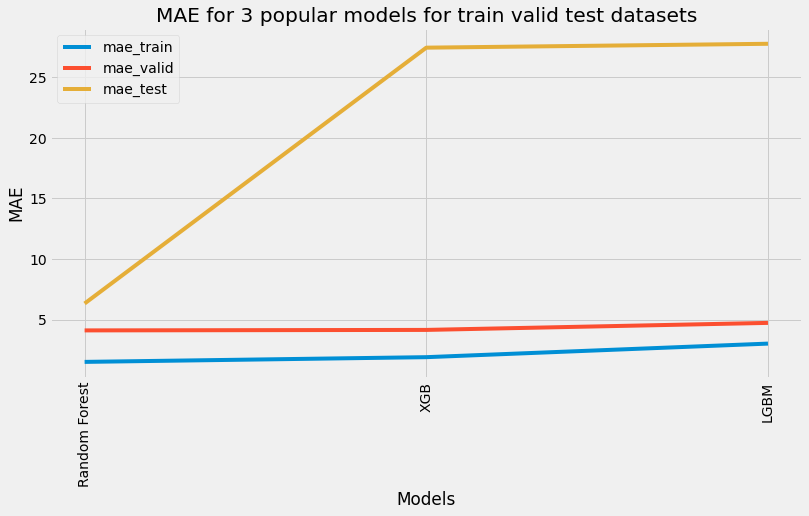

In [124]:
# Plot
plt.figure(figsize=[12,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['mae_train'], label = 'mae_train')
plt.plot(xx, models['mae_valid'], label = 'mae_valid')
plt.plot(xx, models['mae_test'], label = 'mae_test')
plt.legend()
plt.title('MAE for 3 popular models for train valid test datasets')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

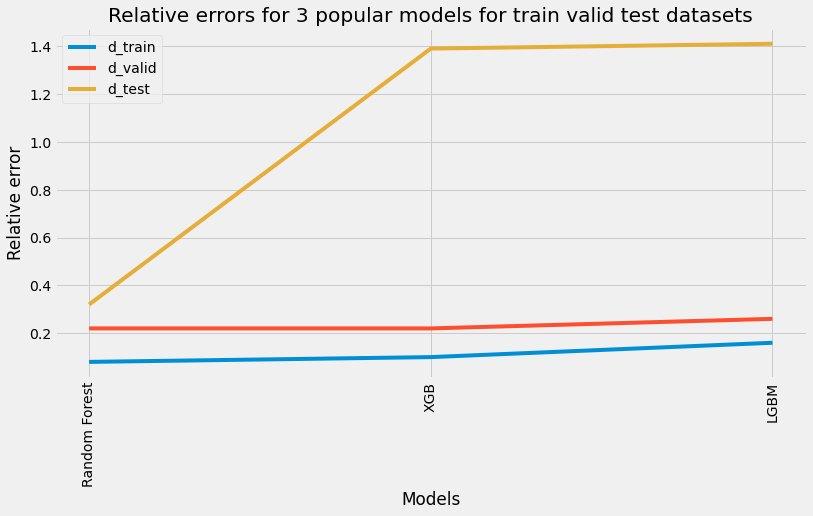

In [125]:
# Plot
plt.figure(figsize=[12,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['d_train'], label = 'd_train')
plt.plot(xx, models['d_valid'], label = 'd_valid')
plt.plot(xx, models['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for 3 popular models for train valid test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

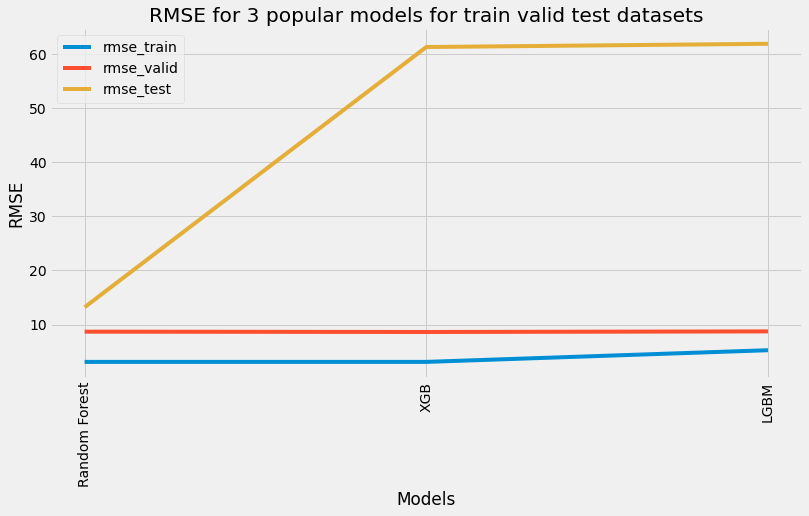

In [126]:
# Plot
plt.figure(figsize=[12,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_valid'], label = 'rmse_valid')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for 3 popular models for train valid test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

### 10 testing in the real test set

In [127]:
final_train_set = lgb.Dataset(trainb, targetb, silent=False)
final_test_set = lgb.Dataset(test2, test_target2, silent=False)

In [128]:
final_test_set

### 11 Prediction


In [129]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2333
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  2334 non-null   int64  
 1   month_number          2334 non-null   int64  
 2   offence_type          2334 non-null   int32  
 3   alcohol_involvement   2334 non-null   int32  
 4   dv_involvement        2334 non-null   int32  
 5   unemployment_rate     2334 non-null   float64
 6   temperature           2334 non-null   float64
 7   rainfall_millimetres  2334 non-null   float64
 8   population            2334 non-null   float64
 9   location              2334 non-null   int32  
dtypes: float64(4), int32(4), int64(2)
memory usage: 164.1 KB


In [130]:
test2.head(3)

,year,month_number,offence_type,alcohol_involvement,dv_involvement,unemployment_rate,temperature,rainfall_millimetres,population,location
0,2018,1,5,0,0,3.88,31.80,206.30,"36,774.00",3
1,2018,1,7,0,0,3.88,31.80,876.60,"86,585.00",0
2,2018,1,21,0,0,3.88,31.80,876.60,"86,585.00",0


In [131]:
#For models from Sklearn
testn = pd.DataFrame(scaler.transform(test2), columns = test2.columns)

In [132]:
# LGB Regression model for basic train
lgb_predict = random_forest.predict(test2)
lgb_predict[:10]

array([ 4.43,  4.45,  4.45,  4.43,  7.15,  7.15, 19.73, 19.5 , 19.5 ,
        8.18])

In [133]:
final_df = test_target2.values
final_df = pd.DataFrame(final_df,columns=['Real_number_of_offences'])
final_df['predicted_number_of_offences'] = lgb_predict.astype(int)
final_df['difference'] = abs(final_df['Real_number_of_offences'] - final_df['predicted_number_of_offences']).astype(int)
final_df

,Real_number_of_offences,predicted_number_of_offences,difference
0,1,4,3
1,1,4,3
2,2,4,2
3,1,4,3
4,51,7,44
...,...,...,...
2329,7,4,3
2330,197,4,193
2331,1,4,3
2332,3,4,1


In [134]:
lgb_predict.astype(int)

array([4, 4, 4, ..., 4, 4, 4])

In [135]:
joblib.dump(modelL,'saved_model.pkl')

['saved_model.pkl']

In [136]:
modelL = joblib.load('saved_model.pkl')